## Does money make people happy?
Let's get some data, plot them, see if we can see a trend. 

We will go through a few steps:
1. *Model selection* - select a model that your data seem to fit in.
2. Define the parameter values that will the model perform best:
    - use a *utility function (or fitness function)* that measures how *good* your model is.
    - use a *cost function* that measures the distance between the model's predictions and the training examples; the objective is to minimize the distance.
    
    For example: Linear Regressions: you feed in your training examples and it finds the parameters that make the linear model fit best to your data. This is called *training* the model.


3. Run the model to make predictions.

We are going to use the Better Life Index data downloaded from [OECD](https://homl.info/4) website:
https://raw.githubusercontent.com/csbfx/advpy122-data/master/OECD_better_life_index.csv

and the GDP per capita USD data downloaded from [IMF](https://homl.info/5) website:
https://raw.githubusercontent.com/csbfx/advpy122-data/master/IMF_GDP_per_capita_USD.csv

### Part 1: (2 points)
Create two dataframes: 
1. A dataframe from the Better Life Index data that contains two columns: `Country` and `Life satisfaction`. Extract the data from the Better Life Index csv file where INEQUALITY = 'TOT' and Indicator = "Life satisfaction" and the data in the `Value` column should be used for the `Life satisfaction` column in the dataframe.
2. A dataframe from the IMF GDP data that contains two columns: `Country` and `GDP per capita (USD)` where data from column `2020` should be used to fill the column `GDP per capita (USD)`. Use `encoding='latin-1'` when reading the csv file using pandas.

In [ ]:
better_life_index = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/OECD_better_life_index.csv"
GDP_per_capita = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/IMF_GDP_per_capita_USD.csv"

In [ ]:
# Data frame #1
# Your code here . . .
import pandas as pd
life_index = pd.read_csv(better_life_index)
new_life_index = life_index[(life_index['INEQUALITY'] == 'TOT') & (life_index['Indicator']== 'Life satisfaction')]
new_life_index.rename(columns = {'Indicator':'Life satisfaction'}, inplace= True)
new_life_index['Life satisfaction'] = life_index['Value']
new_life_index = new_life_index[['Country','Life satisfaction']]
new_life_index

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Country,Life satisfaction
1813,Australia,7.3
1814,Austria,7.1
1815,Belgium,6.9
1816,Canada,7.4
1817,Czech Republic,6.7
1818,Denmark,7.6
1819,Finland,7.6
1820,France,6.5
1821,Germany,7.0
1822,Greece,5.4


In [ ]:
# Data frame #2 
# Your code here . . .
GDP = pd.read_csv(GDP_per_capita, encoding = 'latin-1', thousands=',' )
GDP['GDP per capita (USD)'] = GDP['2020']
GDP = GDP[['Country','GDP per capita (USD)']]
GDP

,Country,GDP per capita (USD)
0,Afghanistan,499.441
1,Albania,4898.280
2,Algeria,3331.080
3,Angola,2021.310
4,Antigua and Barbuda,14158.570
...,...,...
192,Yemen,645.126
193,Zambia,1001.440
194,Zimbabwe,921.847
195,NaN,NaN


### Part 2: Merge the two dataframes by common country names, store the merged dataframe in `merged`. (3 points)

In [ ]:
# Merge the two dataframes by common country names
# Your code here . . .
merged = pd.merge(new_life_index, GDP, on="Country")
merged['GDP per capita (USD)'] = merged['GDP per capita (USD)'].astype(float)
merged.sort_values(by =['GDP per capita (USD)'], ascending=True)

,Country,Life satisfaction,GDP per capita (USD)
37,South Africa,4.7,4735.75
38,Colombia,6.3,5207.24
30,Brazil,6.4,6450.45
27,Turkey,5.5,7715.37
17,Mexico,6.5,8069.10
35,Russia,5.8,9972.50
31,Chile,6.5,12612.32
21,Poland,6.1,15303.54
10,Hungary,5.6,15372.89
34,Latvia,5.9,17230.14


### Part 3: Plot the relationship between `GDP per capita (USD)` and `Life satisfaction` (2 points)

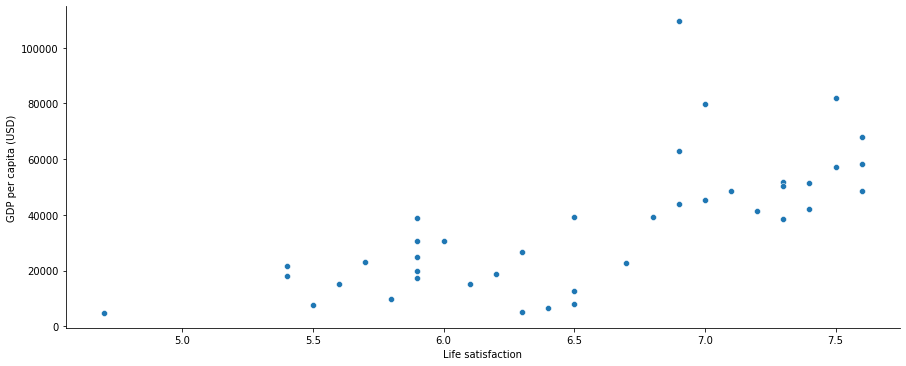

In [ ]:
# Your code here . . . 
import seaborn as sns
sns.relplot(data=merged, x='Life satisfaction', y='GDP per capita (USD)', aspect = 2.5)

### Part 4: Use Scikit-Lrun the following code earn to build a linear model using Linear Regression (3 points)
- Predict the Life Satisfaction of Cyprus based on its GDP per capita.

In [ ]:
import sklearn.linear_model as sklm
# select a linar model
model = sklm.LinearRegression()

In [ ]:
# Train the model
import numpy as np
X = np.c_[merged["GDP per capita (USD)"]] # The feature
y = np.c_[merged["Life satisfaction"]] # The values we try to model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make a prediction for Cyprus
Cyprus_GDP = GDP[GDP['Country']=='Cyprus']
Cyprus_GDP = Cyprus_GDP['GDP per capita (USD)'].values
X_new = [Cyprus_GDP] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.31850263]]
